    Instructions:
    1. Press Run All (or restart kernel and run all cells).
    2. You will be prompted to provide input values.


    Task 0a: Implement a program which computes and prints the “inherent dimensionality” associated with the even numbered Caltec101 images.

In [1]:
FEATURE_SPACE = input("Provide a feature space [color, hog, avgpool, layer3, fc, resnet].")

In [2]:
from utils.database_utils import retrieve

feature_vectors = retrieve(f'{FEATURE_SPACE}.pt')

print("Finding inherent dimensionality of ", FEATURE_SPACE, " feature space.")

Finding inherent dimensionality of  resnet  feature space.


In [3]:
from utils.vector_utils import feature_vectors_to_np_vectors

D = feature_vectors_to_np_vectors(feature_vectors)

print("Initial dimensions: ", len(D[0]))

Initial dimensions:  1000


In [4]:
from feature_reducers.svd import SVDReducer

svd = SVDReducer(feature_vectors, len(D[0]))

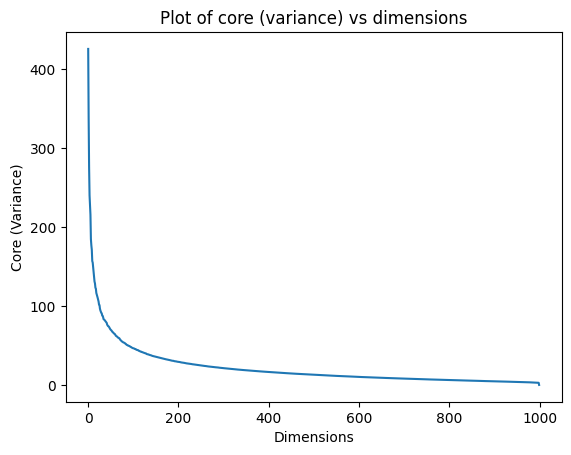

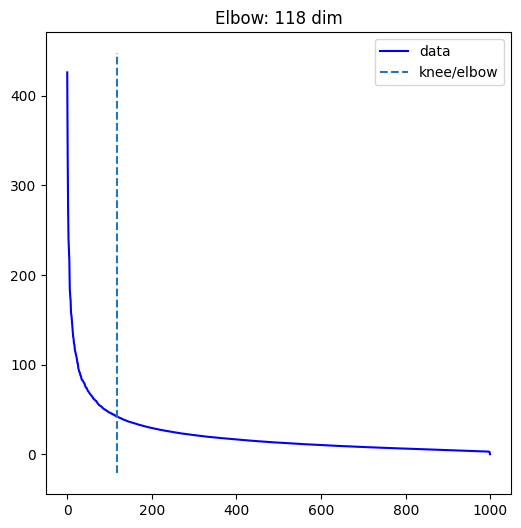

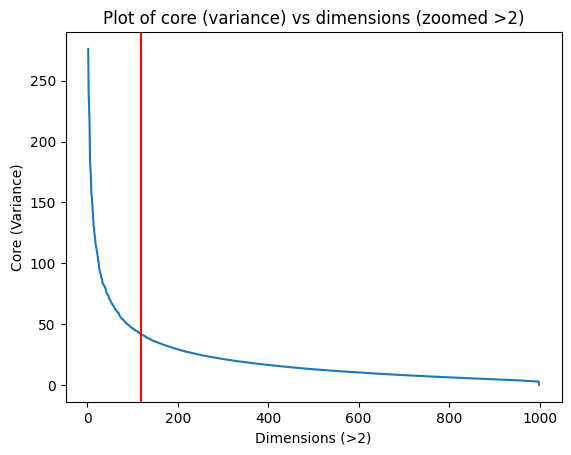

In [5]:
import numpy as np

import pandas as pd

S = pd.DataFrame(np.diag(svd.S), columns=["Variance"])

from kneed import KneeLocator

kneeLocator = KneeLocator(x=S.index, y=S["Variance"], curve="convex", direction="decreasing", S=3.0)

inherent_dim = kneeLocator.elbow

S.plot(title="Plot of core (variance) vs dimensions", legend=None, ylabel="Core (Variance)", xlabel="Dimensions")

kneeLocator.plot_knee(title=f"Elbow: {inherent_dim} dim")

ax = S.iloc[2:].plot(title="Plot of core (variance) vs dimensions (zoomed >2)", legend=None, ylabel="Core (Variance)", xlabel="Dimensions (>2)")
ax.axline((inherent_dim, 0), (inherent_dim, svd.S[2][2]), color="red")

In [6]:
# Compute residual difference between data and data when reconstructed from inherent number of dimensions

def explain_variance(D, svd, dim):
    D_hat = svd.U[:,:dim] @ svd.S[0:dim,:dim] @ svd.V.T[:dim,:]
    resid = abs(D - D_hat)
    print(f"With {dim} dimensions, we can explain {(1 - np.var(resid)/np.var(D))*100}% of the variance")

explain_variance(D, svd, 2)
explain_variance(D, svd, inherent_dim)
explain_variance(D, svd, 500)

print(f"\nHence, the inherent dimensionality is approximately {inherent_dim} dimensions for the chosen feature space: {FEATURE_SPACE}")

With 2 dimensions, we can explain 49.00869237466156% of the variance
With 118 dimensions, we can explain 91.2242920137232% of the variance
With 500 dimensions, we can explain 92.9883795495446% of the variance

Hence, the inherent dimensionality is approximately 118 dimensions for the chosen feature space: resnet
